In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_excel("../Pandas Dataset/uk_export_wordwide(1665-2015).xlsx")
df.head()

,Year,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Total Europe,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 83,Unnamed: 84,Unnamed: 85,Unnamed: 86,Unnamed: 87,Unnamed: 88,Unnamed: 89,Unnamed: 90,Unnamed: 91,Unnamed: 92
0,1665,0.903596,NaN,NaN,NaN,NaN,0.903596,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1666,NaN,NaN,NaN,NaN,NaN,0.901691,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1667,NaN,NaN,NaN,NaN,NaN,0.899786,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1668,NaN,NaN,NaN,NaN,NaN,0.897881,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1669,NaN,NaN,NaN,NaN,NaN,0.895975,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.dropna(axis=1,inplace=True)
df.head()

,Year,Total Europe,Africa,Asia,North America incl. West Indies to 1972,South and Central America,Australia,Check
0,1665,0.903596,0.0,0.014985,0.081419,0.0,0.0,1.0
1,1666,0.901691,0.0,0.015199,0.083110,0.0,0.0,1.0
2,1667,0.899786,0.0,0.015413,0.084801,0.0,0.0,1.0
3,1668,0.897881,0.0,0.015627,0.086493,0.0,0.0,1.0
4,1669,0.895975,0.0,0.015841,0.088184,0.0,0.0,1.0


In [4]:
def multi_by_100(data):
    return data*100


df["Australia"]=df["Australia"].apply(multi_by_100)
df["Africa"]=df["Africa"].apply(multi_by_100)
df["Asia"]=df["Asia"].apply(multi_by_100)
df["North America incl. West Indies to 1972"]=df["North America incl. West Indies to 1972"].apply(multi_by_100)
df["South and Central America"]=df["South and Central America"].apply(multi_by_100)
df["Total Europe"]=df["Total Europe"].apply(multi_by_100)

In [5]:
df=df.sample(200,replace=True).copy()
df.head()

,Year,Total Europe,Africa,Asia,North America incl. West Indies to 1972,South and Central America,Australia,Check
316,1981,59.215870,9.305958,11.687146,15.236291,2.192303,2.362433,1.0
152,1817,55.920082,0.804791,6.961065,30.317948,5.851085,0.145028,1.0
236,1901,41.772509,7.592436,21.253175,14.676828,6.350550,8.354502,1.0
45,1710,87.633511,1.151535,2.102804,9.112150,0.000000,0.000000,1.0
136,1801,41.894661,2.892753,9.370661,44.073589,1.706235,0.062101,1.0


In [6]:
x=df[['Year']]

y=df["Total Europe"]

<Axes: xlabel='Year', ylabel='Total Europe'>

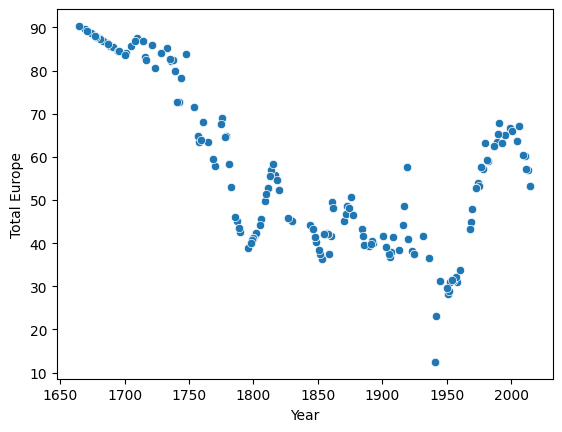

In [7]:
sns.scatterplot(x=x["Year"],y=y,data=df)

In [8]:
pol=PolynomialFeatures(degree=10)

poly_x=pol.fit_transform(x)

x_train,x_test,y_train,y_test=train_test_split(poly_x,y,train_size=.75,random_state=2)
print(len(x_test),len(y_test))

50 50


In [9]:
x_train

array([[1.00000000e+00, 1.96000000e+03, 3.84160000e+06, ...,
        2.17795334e+26, 4.26878854e+29, 8.36682554e+32],
       [1.00000000e+00, 1.99500000e+03, 3.98002500e+06, ...,
        2.50924577e+26, 5.00594531e+29, 9.98686088e+32],
       [1.00000000e+00, 1.89000000e+03, 3.57210000e+06, ...,
        1.62815007e+26, 3.07720364e+29, 5.81591488e+32],
       ...,
       [1.00000000e+00, 1.80900000e+03, 3.27248100e+06, ...,
        1.14685506e+26, 2.07466080e+29, 3.75306139e+32],
       [1.00000000e+00, 1.67900000e+03, 2.81904100e+06, ...,
        6.31546844e+25, 1.06036715e+29, 1.78035645e+32],
       [1.00000000e+00, 1.79600000e+03, 3.22561600e+06, ...,
        1.08255672e+26, 1.94427186e+29, 3.49191226e+32]])

In [10]:
reg=LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [11]:
predicted_y=reg.predict(x_test)
predicted_y

array([38.41689707, 71.42171032, 55.59107714, 39.77037278, 40.13926756,
       74.37663954, 42.85059856, 66.12459113, 45.2092071 , 79.80224498,
       46.4122481 , 62.18846032, 48.82550826, 42.65701952, 55.88197669,
       38.07835848, 60.25415297, 81.64366217, 51.90791878, 45.45980794,
       42.65701952, 92.54884198, 38.07835848, 51.02398673, 70.76083702,
       41.75799828, 38.48391497, 45.68110645, 65.13454747, 80.42114862,
       90.70216463, 39.77037278, 49.8728055 , 38.29977542, 60.25415297,
       44.75011385, 48.82550826, 49.03642045, 49.03642045, 41.59407535,
       49.34474504, 37.9405724 , 45.91001725, 40.68027217, 42.09557828,
       50.44487842, 87.65222418, 53.11215974, 45.44357603, 60.68026637])

<Axes: xlabel='Year', ylabel='Total Europe'>

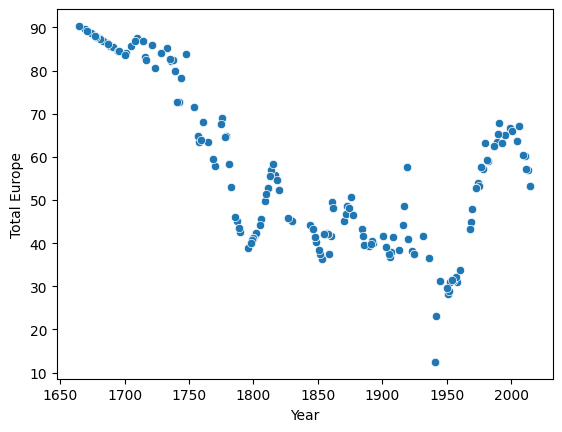

In [12]:
sns.scatterplot(x=df["Year"],y=y)

<Axes: xlabel='Year', ylabel='Total Europe'>

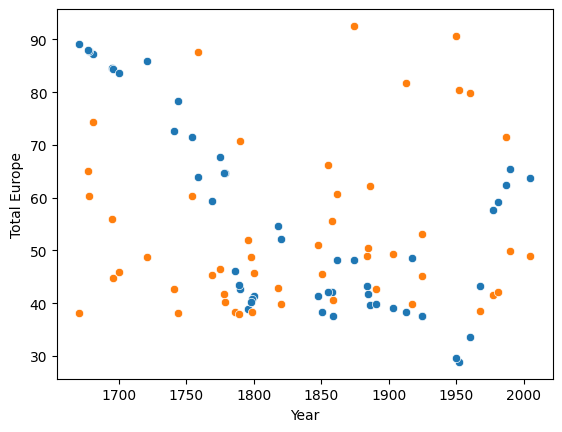

In [13]:
sns.scatterplot(x=df["Year"][150:],y=y[150:])
sns.scatterplot(x=df["Year"][150:],y=predicted_y)


In [14]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,accuracy_score


print(mean_absolute_error(predicted_y,y_test))

print(mean_squared_error(predicted_y,y_test))


7.207966128786548
96.59204143827769


# Trying different degrees and comparing the results

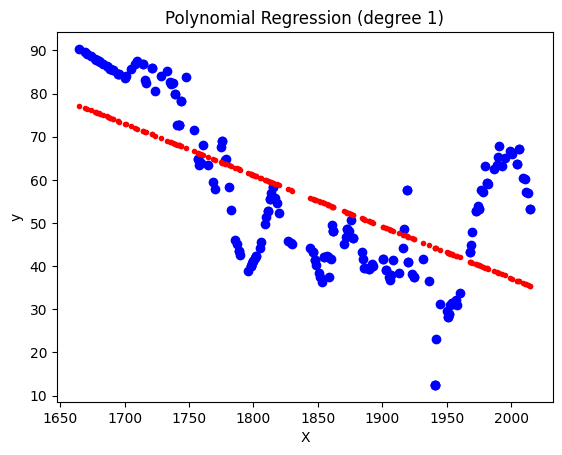

Mean Squared Error for degree 1: 203.25301458594615


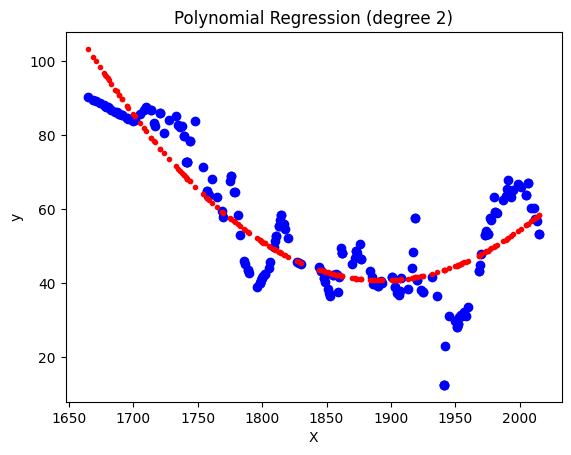

Mean Squared Error for degree 2: 79.19504512155487


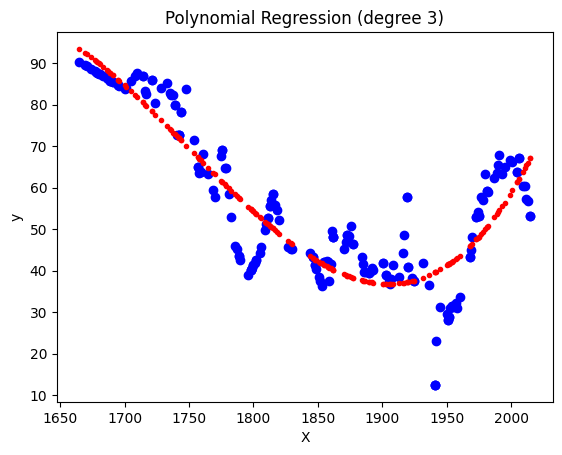

Mean Squared Error for degree 3: 66.203027235473


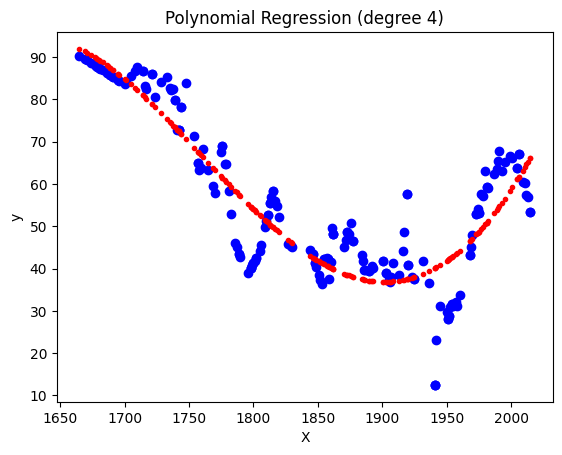

Mean Squared Error for degree 4: 66.02560764246866


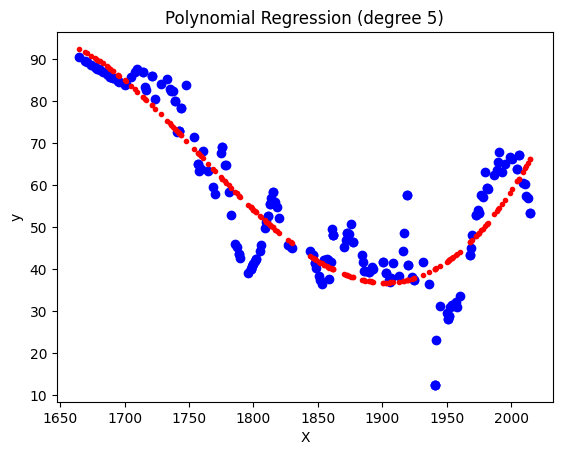

Mean Squared Error for degree 5: 66.09349775687144


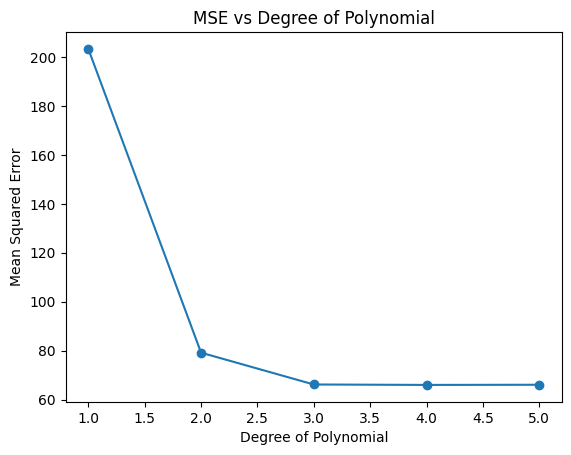

In [16]:

degrees = [1, 2, 3, 4, 5]
mse_list = []

for degree in degrees:
    poly_features = PolynomialFeatures(degree=degree)
    poly_x = poly_features.fit_transform(x)
    
    model = LinearRegression()
    model.fit(poly_x, y)
    
    y_poly_pred = model.predict(poly_x)
    
    mse = mean_squared_error(y, y_poly_pred)
    mse_list.append(mse)
    
    plt.scatter(x["Year"], y, color='blue')
    plt.plot(x["Year"], y_poly_pred,'r.')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.title(f'Polynomial Regression (degree {degree})')
    plt.show()
    
    print(f'Mean Squared Error for degree {degree}: {mse}')

# Plotting MSE vs Degree
plt.plot(degrees, mse_list, marker='o')
plt.xlabel('Degree of Polynomial')
plt.ylabel('Mean Squared Error')
plt.title('MSE vs Degree of Polynomial')
plt.show()
